In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
np.random.seed(12345)
def makeline(r, theta, tmin=-1, tmax=1, n=50, noise=0.01):
    #     r=0.5
    #     theta = 30*np.pi/180
    r0 = r*np.array([np.cos(theta), np.sin(theta)])
    rt = np.array([np.cos(theta+np.pi/2), np.sin(theta+np.pi/2)])

    xy = np.array([r0 + rt*t for t in np.linspace(tmin, tmax, n)])
    xy = xy + np.random.randn(n, 2)*noise
    return xy
#uncomment if you wanna cheat
xy1 = makeline(0.5, 30*np.pi/180)
#plt.plot(xy1[:,0], xy1[:,1], '.')
xy2 = makeline(0.7, -20*np.pi/180)
#plt.plot(xy2[:,0], xy2[:,1], '.')
xy3 = makeline(0, -20*np.pi/180)
#plt.plot(xy3[:,0], xy3[:,1], '.')
xy4 = makeline(0, 30*np.pi/180)
#plt.plot(xy4[:,0], xy4[:,1], '.')

data = np.vstack([xy1, xy2, xy3, xy4])
np.random.shuffle(data)


# Hough Transform(Line Version)

Can you find equation of the lines in this pic(programatically)???

Can you find the corners?

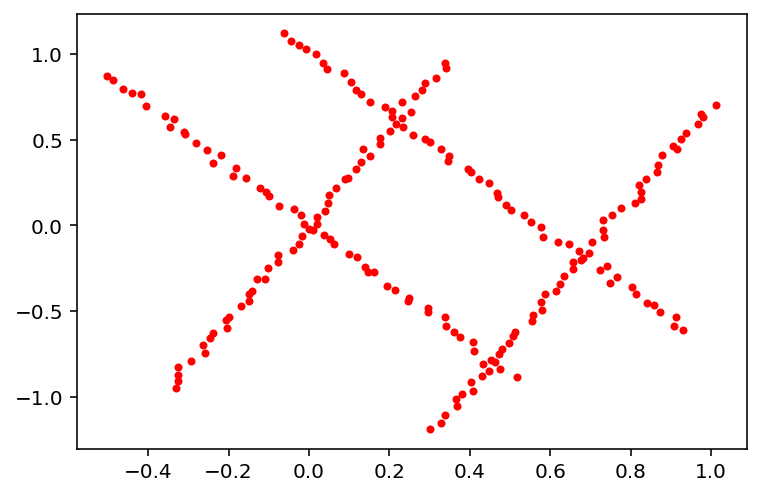

In [5]:
plt.plot(data[:, 0], data[:, 1], '.r')

## Convince your self that a line can be parametrize by $r$ and $\theta$. Write a parametric equation for the line.

In [54]:
def makeline(r: float, theta_rad: float, t_min: float=-2, t_max: float=2, n=100):
    vector_r = np.array([r*np.cos(theta_rad), r*np.sin(theta_rad)])
    q = np.array([
        np.cos(theta_rad + np.pi/2),
        np.sin(theta_rad + np.pi/2)
    ])
    xs = np.array([vector_r[0]+t*q[0] for t in np.linspace(t_min, t_max, n)])
    ys = np.array([vector_r[1]+t*q[1] for t in np.linspace(t_min, t_max, n)])
    return xs, ys

    

## Draw a line with $r=2$, $\theta=30\deg$

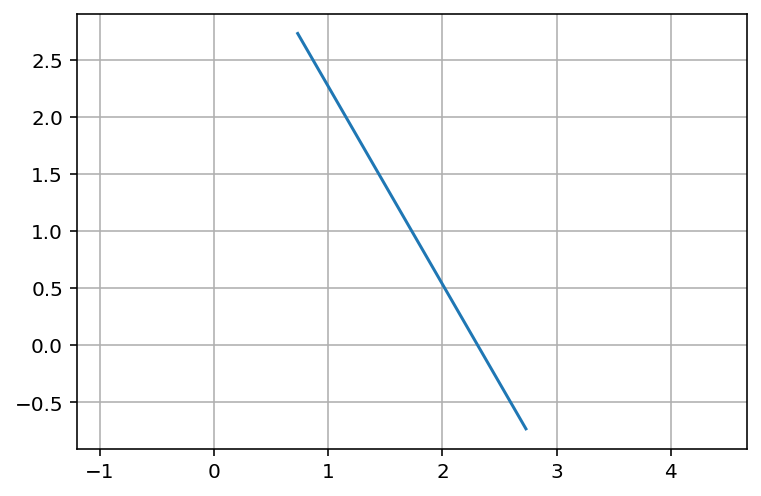

In [55]:
xs, ys = makeline(r=2, theta_rad=np.pi/6)
plt.plot(xs, ys)
plt.axis('equal')
plt.grid()

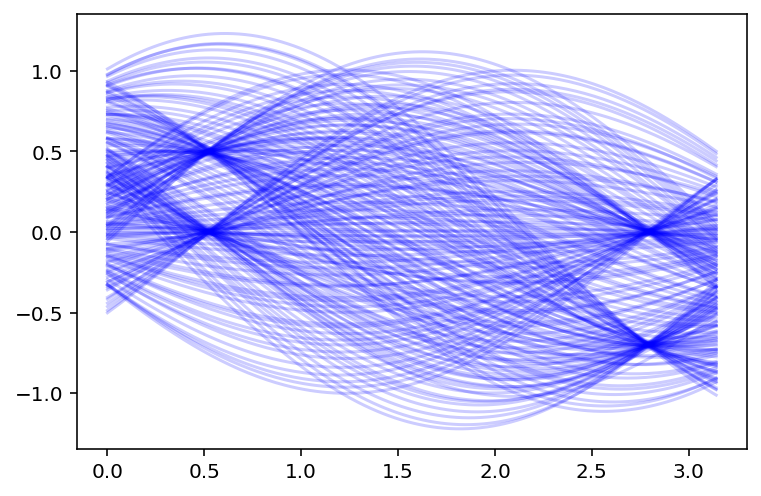

In [56]:
def make_r_theta(x, y):
    thetas = np.linspace(0, np.pi, 200)
    rs = x*np.cos(thetas) + y*np.sin(thetas)
    return rs, thetas

all_rs = []
all_thetas = []
for d in data:
    x, y = d
    rs, thetas = make_r_theta(x,y)
    all_rs.append(rs)
    all_thetas.append(thetas)
    plt.plot(thetas, rs, 'b', alpha=0.2)

## For a point (x,y) what is the set of $r$ and $\theta$ for line that passes through point x and y.

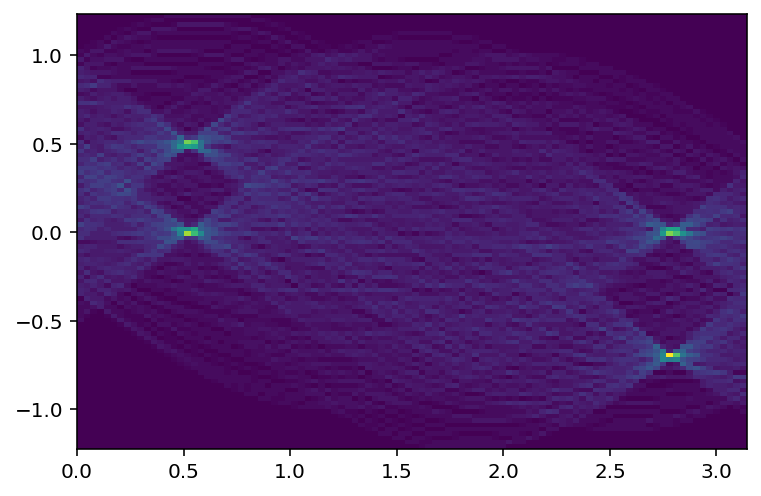

In [57]:
rs = np.concatenate(all_rs)
thetas = np.concatenate(all_thetas)

h, ex, ey, _ = plt.hist2d(thetas, rs, bins=100);

In [58]:
np.max(h)

72.0

16 49 62.0 0.5026548245743669 -0.019267568882042063
16 70 57.0 0.5026548245743669 0.4962512326587569
88 21 72.0 2.7646015351590183 -0.7066259709364404
88 49 58.0 2.7646015351590183 -0.019267568882042063
-0.019267568882042063 0.5026548245743669
0.4962512326587569 0.5026548245743669
-0.7066259709364404 2.7646015351590183
-0.019267568882042063 2.7646015351590183


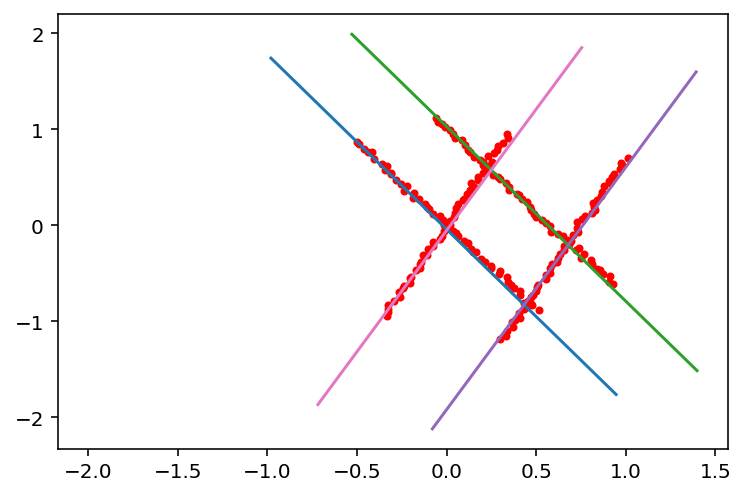

In [59]:
nx, ny = h.shape
good_rs = []
good_thetas = []
for i in range(nx):
    for j in range(ny):
        if h[i,j]> 55:
            theta = ex[i]
            r = ey[j]
            print(i,j,h[i,j], theta, r)
            good_rs.append(r)
            good_thetas.append(theta)
plt.plot(data[:, 0], data[:, 1], '.r')

for r, theta in zip(good_rs, good_thetas):
    print(r, theta)
    xs, ys = makeline(r, theta)
    plt.plot(xs, ys, -2, 2)
    plt.grid()

## Accumulate the $r$ and $\theta$ for all the data points and make a 2d histogram.

## Find the peaks. Easiest way is to just find x>threshold and x is the max within certain window.

## Draw the lines given the peak parameter

# Hough Transform Circle Version.

We can use voting mechanism to actually find any decently-defined geometry

In [71]:
np.random.seed(999)
def make_circle(x, y, r, noise=0.01):
    thetas = np.linspace(0, 2*np.pi, 100)
    ret = [np.array([x, y]) + (r+noise*np.random.randn())*np.array([np.cos(t), np.sin(t)]) for t in thetas]
    return np.array(ret)

c1 = make_circle(1, 1.5, 0.3)
#plt.plot(c1[:,0], c1[:,1], '.')
c2 = make_circle(2, 1, 0.3)
#plt.plot(c2[:,0], c2[:,1], '.')
c3 = make_circle(1, 0.5, 0.1)
#plt.plot(c3[:,0], c3[:,1], '.')
#plt.gca().set_aspect(1)

data = np.vstack([c1, c2, c3])
np.random.shuffle(data)

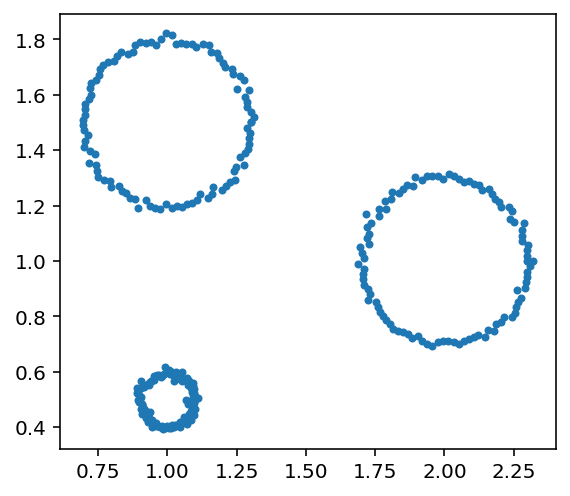

In [72]:
plt.plot(data[:,0], data[:, 1], '.')
plt.gca().set_aspect(1)

## How do we parametrize a circle?

(0.0, 20.0)

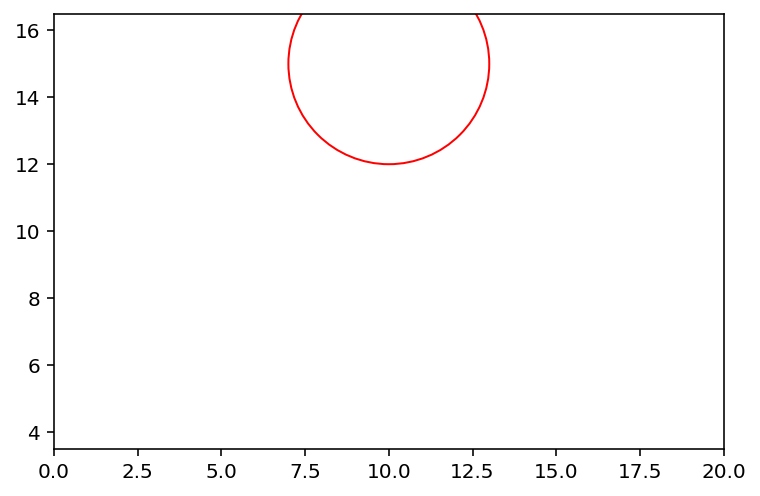

In [97]:
def draw_circle(cx, cy, r):
    colored_circle = plt.Circle(( cx ,cy ), r ,color='red',fill=False)
    axes = plt.gca()
    axes.add_artist( colored_circle )
draw_circle(10,15, 3)
plt.axis('equal')
plt.xlim(0,20)
plt.ylim(0,20)


## Given a point x,y what are the set of the parameter for the circle that pass through it.

In [98]:
from dataclasses import dataclass
from typing import List

@dataclass
class Circle:
    cx: float
    cy: float
    r: float

search_range_xs = np.linspace(0.6, 2.5, 100)
search_range_ys = np.linspace(0.3, 2.0, 100)
def find_circles(x: float, y:float) -> List[Circle]:
    ret = []
    for cx in search_range_xs:
        for cy in search_range_ys:
            ret.append( Circle(cx, cy, r=np.sqrt((x-cx)**2 + (y-cy)**2)) )
    return ret

## Accumulate

In [99]:
all_circles = []
for d in data:
    all_circles.extend(find_circles(*d))
circles = np.array([[c.cx, c.cy, c.r] for c in all_circles])

77.0


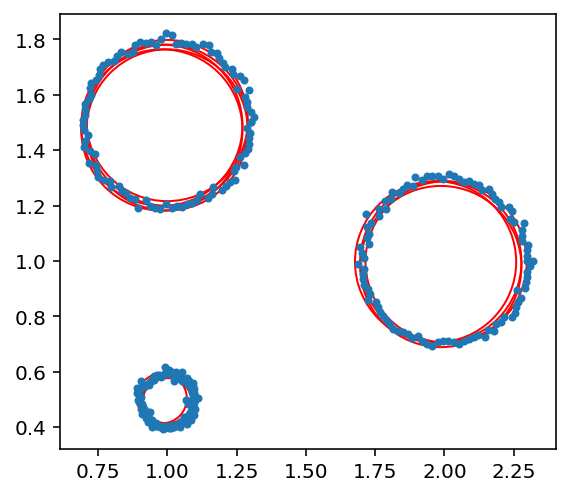

In [106]:
h, edges = np.histogramdd(circles,bins=100)
n_cx, n_cy, n_r = h.shape
print(np.max(h))
good_circles = []
for i_cx in range(n_cx):
    for i_cy in range(n_cy):
        for i_r in range(n_r):
            if h[i_cx, i_cy, i_r] > 42:
                cx = edges[0][i_cx]
                cy = edges[1][i_cy]
                r = edges[2][i_r]
                #print(h[i_cx, i_cy, i_r], cx, cy, r)
                good_circles.append(Circle(cx, cy, r))
 
plt.plot(data[:,0], data[:, 1], '.')
plt.gca().set_aspect(1)

for cir in good_circles:
    draw_circle(cir.cx, cir.cy, cir.r)


In [101]:
edges

[array([0.6  , 0.638, 0.676, 0.714, 0.752, 0.79 , 0.828, 0.866, 0.904,
        0.942, 0.98 , 1.018, 1.056, 1.094, 1.132, 1.17 , 1.208, 1.246,
        1.284, 1.322, 1.36 , 1.398, 1.436, 1.474, 1.512, 1.55 , 1.588,
        1.626, 1.664, 1.702, 1.74 , 1.778, 1.816, 1.854, 1.892, 1.93 ,
        1.968, 2.006, 2.044, 2.082, 2.12 , 2.158, 2.196, 2.234, 2.272,
        2.31 , 2.348, 2.386, 2.424, 2.462, 2.5  ]),
 array([0.3  , 0.334, 0.368, 0.402, 0.436, 0.47 , 0.504, 0.538, 0.572,
        0.606, 0.64 , 0.674, 0.708, 0.742, 0.776, 0.81 , 0.844, 0.878,
        0.912, 0.946, 0.98 , 1.014, 1.048, 1.082, 1.116, 1.15 , 1.184,
        1.218, 1.252, 1.286, 1.32 , 1.354, 1.388, 1.422, 1.456, 1.49 ,
        1.524, 1.558, 1.592, 1.626, 1.66 , 1.694, 1.728, 1.762, 1.796,
        1.83 , 1.864, 1.898, 1.932, 1.966, 2.   ]),
 array([8.46466463e-04, 4.54793597e-02, 9.01122529e-02, 1.34745146e-01,
        1.79378039e-01, 2.24010932e-01, 2.68643826e-01, 3.13276719e-01,
        3.57909612e-01, 4.02542505e-01, 4.

## Find Peak

## Draw the Circle... We can also use this to count the circle.